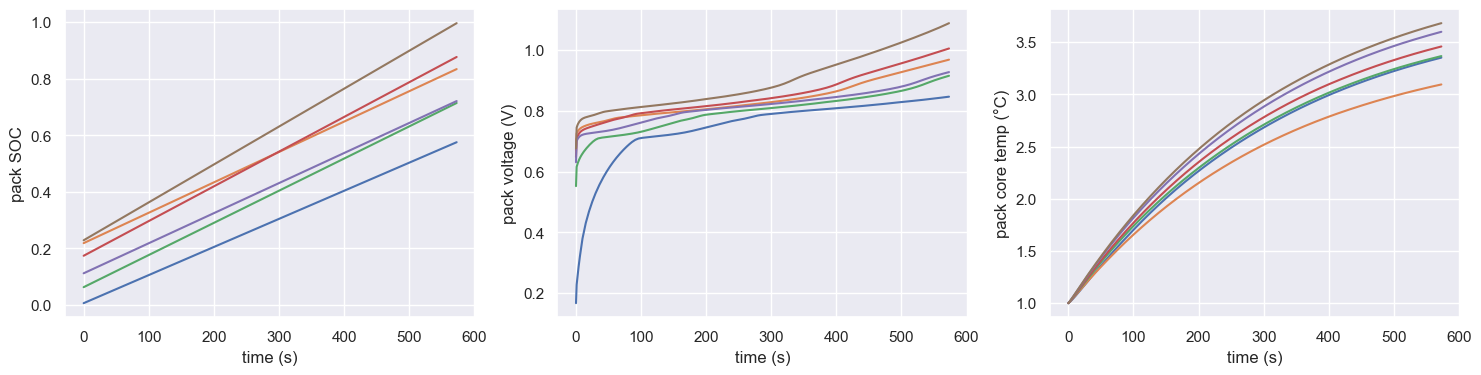

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from LIBEnv.LIB_gym_delta import LIBPackEnv
import seaborn as sns
sns.set_theme()

env = LIBPackEnv('./LIBEnv/PANmodel.mat', number_of_cells=6, T=25, dt=1, use_priority=False)

pack_res=[]
rewards = []
pack_res.append(env.reset()[0].reshape(3,6))
done = False
while not done:
    next_state, reward, done, _, info = env.step(np.ones(7))
    pack_res.append(next_state.reshape(3,6))
    rewards.append(reward)

pack_res = np.array(pack_res)
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
plt.plot(pack_res[:,0,:])
plt.xlabel('time (s)')
plt.ylabel('pack SOC')
plt.grid('on')
plt.subplot(1,3,2)
plt.plot(pack_res[:,1,:])
plt.xlabel('time (s)')
plt.ylabel('pack voltage (V)')
plt.grid('on')
plt.subplot(1,3,3)
plt.plot(pack_res[:,2,:])
plt.xlabel('time (s)')
plt.ylabel('pack core temp (°C)')
plt.grid('on')

# MPC Controller

In [11]:
import numpy as np
from scipy.optimize import minimize
import copy

class MPC_Controller:
    def __init__(self, horizon):
        self.horiz = horizon

    def mpc_cost(self, u_k, battery_model):
        mpc_battery_model = copy.copy(battery_model)    
        u_k = u_k.reshape(self.horiz, 7).T
        cost = 0.0

        for i in range(self.horiz):
            next_state, reward, done, _, info = mpc_battery_model.step(u_k[:,i].ravel())
            cost -= reward
        return cost

    def optimize(self, battery_model):
        bnd = ([(0, 1)]*6+[(0, 2)])*self.horiz
        result = minimize(self.mpc_cost, args=(battery_model), x0 = np.zeros((7*self.horiz)), method='SLSQP', bounds = bnd)
        return result.x[:7]

env = LIBPackEnv('./LIBEnv/PANmodel.mat', number_of_cells=6, T=25, dt=1, use_priority=False)

MPC_HORIZON = 5
MPC_controller = MPC_Controller(MPC_HORIZON)
charge_current = MPC_controller.optimize(env)

charge_current

array([0.00000000e+00, 0.00000000e+00, 2.28627292e-26, 0.00000000e+00,
       0.00000000e+00, 4.59251582e-12, 4.59251582e-12])

In [1]:
[[(0, 1)]*6+[(0, 2)]]*self.horiz

[1, 2, 3, 4]

In [7]:
len(([(0, 1)]*6+[(0, 2)])*6)

42